In [1]:
%matplotlib inline
import random
import numpy as np
import math

In [2]:
L = 1000
N = 10
e = 0.000001

In [3]:
p = np.ones(N)
g = np.empty((N,N))
Gamma = np.empty(N)
sigma  = np.empty(N)
gamma = np.empty(N)
p_new = np.empty(N)

In [4]:
x = np.empty(N) ; y = np.empty(N)

In [5]:
def cal_gain(x0, x1, y0, y1):
    r = math.hypot(x1 - x0, y1 - y0)
    return 1.0 / (r * r)

In [6]:
random.seed(0)
for i in range(N):
    x[i] = random.uniform(0 , L ) ; y[i] = random.uniform(0 , L )
    Gamma[i] = random.uniform(2, 10)
    sigma[i] = random.normalvariate(0, 1)
for i in range(N):
    for j in range(N):
        if i == j :
            g[i, j] = 1.0
        else:
            g[i, j] = g[j, i] =  cal_gain(x[i], x[j], y[i], y[j])

In [7]:
counter = 0

In [8]:
while not(np.all(abs(Gamma - gamma) < e )):
#for k in range(100):
    counter += 1
    for i in range(N):
        s = 0
        for j in range(0, i):
            s += g[i, j] * p[j]
        for j in range(i+1, N):
            s += g[i, j] * p[j]
        if(p[i] == 0):
            p[i] = Gamma[i] *(s + sigma[i] * sigma[i]) / g[i, i]
        else:
            gamma[i] = g[i, i] * p[i] / (s + sigma[i] * sigma[i])
            p[i] = (Gamma[i] / gamma[i] ) * p[i]

In [9]:
for i in p:
    print(i)

5.38395868527
24.2005627682
7.37320377635
2.18650274562
4.99406466685
3.17248483289
0.527913047335
0.897913758205
10.5431375986
29.4438314566


In [10]:
p_cal = np.empty((N, 1))
g_cal = np.empty((N,N))
Gamma_cal = np.empty((N, 1))
f_cal = np.empty((N,N))
n_cal = np.empty((N,1))
sigma_cal = np.empty((N,1))
i_cal = np.identity(N)

In [11]:
g_cal = g
Gamma_cal = Gamma
sigma_cal = sigma
for i in range(N):
    n_cal[i] = Gamma_cal[i] * sigma_cal[i] * sigma_cal[i] / g_cal[i, i]

In [12]:
from numpy import linalg as la
for i in range(N):
    for j in range(N):
        if i == j :
            f_cal[i, j]=0
        else :
            f_cal[i, j]  = Gamma_cal[i] * g_cal[i, j] / g_cal[i, i]
p_cal = la.inv(i_cal - f_cal ) .dot(n_cal)

In [13]:
print (p - p_cal)

[[ -1.59872116e-14   1.88166041e+01   1.98924509e+00  -3.19745594e+00
   -3.89894018e-01  -2.21147385e+00  -4.85604564e+00  -4.48604493e+00
    5.15917891e+00   2.40598728e+01]
 [ -1.88166041e+01  -1.24344979e-13  -1.68273590e+01  -2.20140600e+01
   -1.92064981e+01  -2.10280779e+01  -2.36726497e+01  -2.33026490e+01
   -1.36574252e+01   5.24326869e+00]
 [ -1.98924509e+00   1.68273590e+01  -2.22044605e-14  -5.18670103e+00
   -2.37913911e+00  -4.20071894e+00  -6.84529073e+00  -6.47529002e+00
    3.16993382e+00   2.20706277e+01]
 [  3.19745594e+00   2.20140600e+01   5.18670103e+00  -2.22044605e-15
    2.80756192e+00   9.85982087e-01  -1.65858970e+00  -1.28858899e+00
    8.35663485e+00   2.72573287e+01]
 [  3.89894018e-01   1.92064981e+01   2.37913911e+00  -2.80756192e+00
   -1.24344979e-14  -1.82157983e+00  -4.46615162e+00  -4.09615091e+00
    5.54907293e+00   2.44497668e+01]
 [  2.21147385e+00   2.10280779e+01   4.20071894e+00  -9.85982087e-01
    1.82157983e+00   8.88178420e-16  -2.64457

In [14]:
for i in p_cal:
    print(i)

[ 5.38395869]
[ 24.20056277]
[ 7.37320378]
[ 2.18650275]
[ 4.99406467]
[ 3.17248483]
[ 0.52791305]
[ 0.89791376]
[ 10.5431376]
[ 29.44383146]


In [15]:
for i in Gamma:
    print(i)
print()
for i in sigma:
    print(i)

6.40051217813
9.36297435027
8.80958003863
6.93846545254
6.01489030624
2.51567635479
2.09480672655
3.80323425478
7.67089187341
7.3598897701

-0.917024408902
1.60722156567
-0.911258836768
-0.560937509144
-0.910736657053
-1.12292678718
0.50073590252
0.484127100119
-1.1721844527
1.99966754031


In [23]:
for i in g:
    for j in i:
        print (j,end=""), 
        print(",",end=""),
    print()

1.0,1.31870541747e-06,1.26065483026e-06,6.44764838048e-05,9.74306600676e-07,3.528056239e-06,9.76339185727e-07,7.77467828148e-07,8.64619655896e-07,1.15087854814e-06,
1.31870541747e-06,1.0,8.77364715252e-05,1.64170972697e-06,5.14193352789e-06,1.03574182053e-06,3.13383907997e-06,2.1893538606e-06,2.0966639013e-06,2.83733719952e-05,
1.26065483026e-06,8.77364715252e-05,1.0,1.60173458711e-06,8.94775455277e-06,1.12759116449e-06,4.72034675862e-06,3.08483993586e-06,2.91032791781e-06,0.000147483746546,
6.44764838048e-05,1.64170972697e-06,1.60173458711e-06,1.0,1.25306502229e-06,4.8856352671e-06,1.26678507091e-06,9.80415550981e-07,1.10589586714e-06,1.46645688808e-06,
9.74306600676e-07,5.14193352789e-06,8.94775455277e-06,1.25306502229e-06,1.0,1.30886995725e-06,4.77450734175e-05,1.8010271955e-05,1.42398592845e-05,1.52243886274e-05,
3.528056239e-06,1.03574182053e-06,1.12759116449e-06,4.8856352671e-06,1.30886995725e-06,1.0,1.57353486993e-06,1.29207444563e-06,1.57130698778e-06,1.13840037498e-06,
9.76339

In [16]:
import matplotlib.pyplot as plt

/Users/admin/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


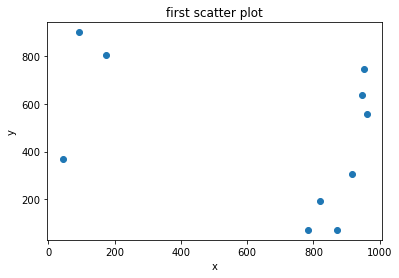

In [17]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)

ax.set_title('first scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()